### Импорт библиотек:

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

### Загрузка данных о поездках:

In [129]:
df = pd.read_csv("poezdki.csv")

### Информация о столбцах таблицы:

In [130]:
df.head()

,hash_ticket_uid,start_trip_dttm,start_latitude,start_longitude,start_entrance_id,start_entrance_nm,start_station_id,start_station_nm,start_line_id,start_line_nm,...,end_station_id,end_station_nm,end_line_id,end_line_nm,end_stop_id,end_stop_nm,end_longitude,end_longitude.1,trip_dur,subwindow_num
0,700702083475E41178E1F18CC7926A16,2022-04-04 14:56:40.0,55.705369,37.686200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1001331.0,МЦК Автозаводская,37.663325,37.663325,8.98,3.0
1,D4AB585E4AA790FBBAD4BF86CADB95B6,2022-04-04 16:45:47.0,55.779659,37.633563,195.0,Проспект Мира К,5011.0,Проспект Мира,5.0,Кольцевая,...,2005.0,Водный стадион,2.0,Замоскворецкая,NaN,NaN,37.486795,37.486795,22.15,2.0
2,C1E6D455DED5D7DBD7A63E437FC749AA,2022-04-04 10:44:35.0,55.855686,37.354120,2101.0,Пятницкое шоссе (Первый),3016.0,Пятницкое шоссе,3.0,Арбатско-Покровская,...,9009.0,Нагатинская,9.0,Серпуховско-Тимирязевская,NaN,NaN,37.622125,37.622125,56.75,1.0
3,33704A9BE7B8183CAF97BB01B1FEFDDD,2022-04-04 13:55:02.0,55.724571,37.818664,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15936.0,"Метро ""Выхино"" (выс.)",37.817305,37.817305,2.02,1.0
4,ADA858BB46FAA6C46187FD7F8B7B555D,2022-04-04 17:27:46.0,55.707654,37.586216,266.0,Ленинский проспект (Северный),6010.0,Ленинский проспект,6.0,Калужско-Рижская,...,6020.0,Тёплый Стан,6.0,Калужско-Рижская,NaN,NaN,37.507044,37.507044,16.63,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777900 entries, 0 to 3777899
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   hash_ticket_uid    object 
 1   start_trip_dttm    object 
 2   start_latitude     float64
 3   start_longitude    float64
 4   start_entrance_id  float64
 5   start_entrance_nm  object 
 6   start_station_id   float64
 7   start_station_nm   object 
 8   start_line_id      float64
 9   start_line_nm      object 
 10  start_stop_id      float64
 11  start_stop_nm      object 
 12  route_num          object 
 13  vehicle_type       object 
 14  vehicle_type.1     object 
 15  end_trip_dttm      object 
 16  end_station_id     float64
 17  end_station_nm     object 
 18  end_line_id        float64
 19  end_line_nm        object 
 20  end_stop_id        float64
 21  end_stop_nm        object 
 22  end_longitude      float64
 23  end_longitude.1    float64
 24  trip_dur           float64
 25  subwindow_num     

### Выделим необходимые данные для анализа:

In [5]:
df = df[["hash_ticket_uid", "start_trip_dttm", "start_latitude", "start_longitude", "start_entrance_nm", "start_station_nm", "start_line_nm", "start_stop_nm", "route_num", "vehicle_type", "end_trip_dttm", "end_station_nm", "end_line_nm", "end_stop_nm", "end_longitude", "trip_dur"]]

In [6]:
df.head(5)

,hash_ticket_uid,start_trip_dttm,start_latitude,start_longitude,start_entrance_nm,start_station_nm,start_line_nm,start_stop_nm,route_num,vehicle_type,end_trip_dttm,end_station_nm,end_line_nm,end_stop_nm,end_longitude,trip_dur
0,700702083475E41178E1F18CC7926A16,2022-04-04 14:56:40.0,55.705369,37.686200,NaN,NaN,NaN,"""Метро """"Кожуховская""""""",944,Автобус,2022-04-04 15:05:39.0,NaN,NaN,МЦК Автозаводская,37.663325,8.98
1,D4AB585E4AA790FBBAD4BF86CADB95B6,2022-04-04 16:45:47.0,55.779659,37.633563,Проспект Мира К,Проспект Мира,Кольцевая,NaN,NaN,NaN,2022-04-04 17:07:56.0,Водный стадион,Замоскворецкая,NaN,37.486795,22.15
2,C1E6D455DED5D7DBD7A63E437FC749AA,2022-04-04 10:44:35.0,55.855686,37.354120,Пятницкое шоссе (Первый),Пятницкое шоссе,Арбатско-Покровская,NaN,NaN,NaN,2022-04-04 11:41:20.0,Нагатинская,Серпуховско-Тимирязевская,NaN,37.622125,56.75
3,33704A9BE7B8183CAF97BB01B1FEFDDD,2022-04-04 13:55:02.0,55.724571,37.818664,NaN,NaN,NaN,"Снайперская ул., 3",314,Автобус,2022-04-04 13:57:03.0,NaN,NaN,"Метро ""Выхино"" (выс.)",37.817305,2.02
4,ADA858BB46FAA6C46187FD7F8B7B555D,2022-04-04 17:27:46.0,55.707654,37.586216,Ленинский проспект (Северный),Ленинский проспект,Калужско-Рижская,NaN,NaN,NaN,2022-04-04 17:44:24.0,Тёплый Стан,Калужско-Рижская,NaN,37.507044,16.63


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777900 entries, 0 to 3777899
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   hash_ticket_uid    object 
 1   start_trip_dttm    object 
 2   start_latitude     float64
 3   start_longitude    float64
 4   start_entrance_nm  object 
 5   start_station_nm   object 
 6   start_line_nm      object 
 7   start_stop_nm      object 
 8   route_num          object 
 9   vehicle_type       object 
 10  end_trip_dttm      object 
 11  end_station_nm     object 
 12  end_line_nm        object 
 13  end_stop_nm        object 
 14  end_longitude      float64
 15  trip_dur           float64
dtypes: float64(4), object(12)
memory usage: 461.2+ MB


### start_trip_dttm и end_trip_dttm у нас определились как object. Приведем их к типу datetime:

In [8]:
df['start_trip_dttm'] = pd.to_datetime(df['start_trip_dttm'])
df['end_trip_dttm'] = pd.to_datetime(df['end_trip_dttm'])

## Анализ станций метро

### Рассмотрим откуда чаще всего люди начинают поездку и где заканчивают

Text(0, 0.5, 'Кол-во человек начавших поездку')

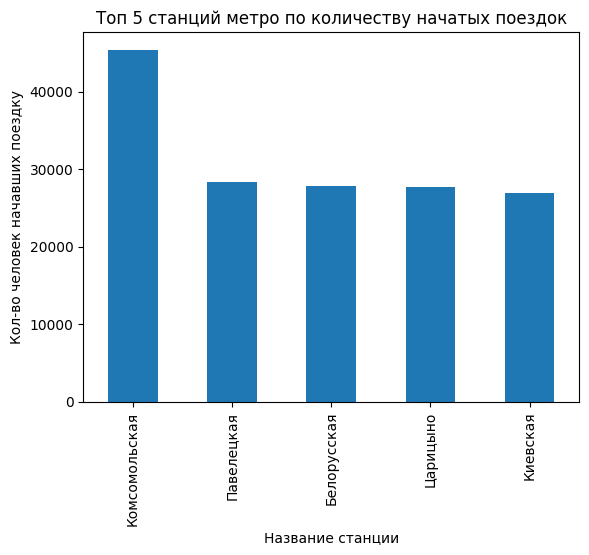

In [20]:
df["start_station_nm"].value_counts().head(5).plot(kind="bar").set_title("Топ 5 станций метро откуда начинают поездку")
plt.xlabel("Название станции")
plt.ylabel("Кол-во человек начавших поездку")

1. **Комсомольская** - рядям со станцией расположено 3 вокзала
2. **Павелецкая** - вокзал
3. **Белорусская** - вокзал
4. **Царицыно** - жилой район + МЦД + парк Царицыно
5. **Киевская** - вокзал

### Теперь рассмотрим где чаще всего заканчивают поездки

Text(0, 0.5, 'Кол-во человек зокончивших поездку')

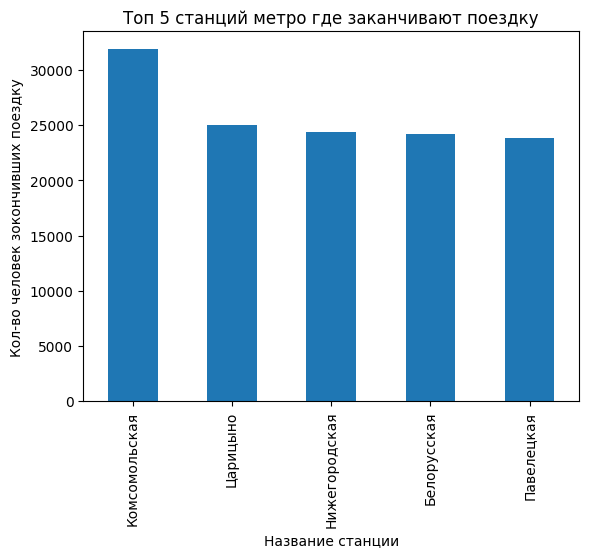

In [21]:
df["end_station_nm"].value_counts().head(5).plot(kind="bar").set_title("Топ 5 станций метро где заканчивают поездку")
plt.xlabel("Название станции")
plt.ylabel("Кол-во человек зокончивших поездку")

**Комсомольская, Белорусская и Павелецкая остаются в топ 5 так как там расположены вокзалы**
**Интересная ситуация с Царицыно и Нижегородской. Попробуем разобраться почему на эти станции чаще всего приезжают люди**
**На Нижегородской 3 железнодородных направления, пересадка на МЦК**

## Рассмотрим откуда едут в Царицыно

### Автобусные остановки

In [121]:
filter = df['end_stop_nm'].str.contains("Царицыно") == True
banwords = ['Поликлиника', 'Школа', 'Детская п-ка', "\"Метро \"\"Царицыно\"\"\""]
df[filter][~df['start_stop_nm'].isin(banwords)].value_counts(['start_stop_nm']).head(20)

C:\Users\akab2\AppData\Local\Temp\ipykernel_7888\3133093549.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[filter][~df['start_stop_nm'].isin(banwords)].value_counts(['start_stop_nm']).head(20)


start_stop_nm               
"К/т ""Керчь"""                 159
6-я Радиальная улица            150
6-й мкр. Загорья                135
Проектируемый проезд №6630      129
Бирюлёвская улица, 5            128
Мебельная ф-ка                  125
Ягодная улица                   117
Элеваторная улица               106
Лебедянская ул.                 103
Аптека                          103
Педагогическая ул.              102
Ин-т Садоводства                102
Ст. Бирюлево-тов.                97
"МФЦ ""Бирюлёво Восточное"""     90
Липецкая ул., 7                  82
Загорьевская ул., 29             80
Каспийская ул., 26               80
Почта                            73
Финансовый колледж               71
Липецкая ул., 40                 70
dtype: int64

In [122]:
mylist = ["\"\"К/т \"\"Керчь\"\"",
"6-я Радиальная улица",
"6-й мкр. Загорья",
"Проектируемый проезд №6630",
"Бирюлёвская улица, 5",
"Мебельная ф-ка",
"Ягодная улица",
"Элеваторная улица",
"Лебедянская ул.",
"Аптека",
"Педагогическая ул.",
"Ин-т Садоводства",
"Ст. Бирюлево-тов.",
"\"МФЦ \"\"Бирюлёво Восточное\"\"\"",
"Липецкая ул., 7",
"Загорьевская ул., 29",
"Каспийская ул., 26",
"Почта",
"Финансовый колледж",
"Липецкая ул., 40'"]

### Карта остановок

In [126]:
map = folium.Map(location=[55.4507, 37.3656], zoom_start=8)

In [127]:
my_bus_lat = mydf['start_latitude']
my_bus_long = mydf['start_longitude']
my_elevation_bus = mydf['start_stop_nm']

lat_test = my_bus_lat[:20]
long_test = my_bus_long[:20]
elevation_bus_test = my_elevation_bus[:20]

In [128]:
for lat_test, long_test, elevation_bus_test in zip(lat_test, long_test, elevation_bus_test):
    folium.Marker(location=[lat_test, long_test], popup=str(elevation_bus_test)+" m", icon = folium.Icon(color = 'red')).add_to(map)
map

### Самые популярные автобусные маршруты до метро Царицыно

In [57]:
filter = df['end_stop_nm'].str.contains("Царицыно") == True
df[filter].value_counts(['route_num']).head(15)

route_num
М89          1189
М88           848
М87           801
814           711
844           223
921           183
С823           90
М82            73
С869           49
С854           11
Н13             2
dtype: int64

In [91]:
filter = df['end_stop_nm'].str.contains("Царицыно") == True
banwords = ['Поликлиника', 'Школа', 'Детская п-ка', "\"Метро \"\"Царицыно\"\"\""]
mydf = df[filter][~df['start_stop_nm'].isin(banwords)]
mydf.drop_duplicates(subset = "start_stop_nm")

C:\Users\akab2\AppData\Local\Temp\ipykernel_7888\561345713.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mydf = df[filter][~df['start_stop_nm'].isin(banwords)]


,hash_ticket_uid,start_trip_dttm,start_latitude,start_longitude,start_entrance_nm,start_station_nm,start_line_nm,start_stop_nm,route_num,vehicle_type,end_trip_dttm,end_station_nm,end_line_nm,end_stop_nm,end_longitude,trip_dur
2086,99AB81E982377C247066EC266186419C,2022-04-04 08:07:14,55.596846,37.672199,NaN,NaN,NaN,Педагогическая ул.,М87,Автобус,2022-04-04 08:19:46,NaN,NaN,"""Метро """"Царицыно""""""",37.669136,12.53
2178,88FC2D06683EA9240178FCD018434269,2022-04-04 10:49:38,55.621990,37.741971,NaN,NaN,NaN,"""Метро """"Шипиловская""""""",М82,Автобус,2022-04-04 11:12:12,NaN,NaN,МЦД Царицыно,37.673102,22.57
2256,8AE025DC1F7B56B38D3590FD611F8A67,2022-04-04 07:09:31,55.588068,37.637258,NaN,NaN,NaN,Харьковская ул.,921,Автобус,2022-04-04 07:50:32,NaN,NaN,"""Метро """"Царицыно""""""",37.669136,41.02
2804,5CAEDEF69ABC9ADF99D088F029D1909C,2022-04-04 07:04:46,55.627729,37.655664,NaN,NaN,NaN,Бакинская ул.,814,Автобус,2022-04-04 07:15:15,NaN,NaN,МЦД Царицыно,37.665699,10.48
2970,F2EC5CDC28E37D46EBAEAD07EA61A72F,2022-04-04 19:38:22,55.616271,37.661942,NaN,NaN,NaN,Центр крови,М89,Автобус,2022-04-04 19:39:17,NaN,NaN,"""Метро """"Царицыно""""""",37.671339,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127451,694A4ACCC0908366B398C37BE7119F89,2022-04-04 14:02:19,55.614665,37.694893,NaN,NaN,NaN,"Метро ""Орехово""",С854,Автобус,2022-04-04 14:06:10,NaN,NaN,"МЦД ""Царицыно""",37.673102,3.85
3175952,13174593F336CCF291A5C0C3A21715B9,2022-04-04 09:04:48,55.636919,37.694534,NaN,NaN,NaN,Сабурово,С823,Автобус,2022-04-04 09:31:36,NaN,NaN,"""Метро """"Царицыно""""""",37.668580,26.80
3186780,AE480955261B7AC83D85B6A44F1B82A5,2022-04-04 12:56:06,55.621892,37.736927,NaN,NaN,NaN,"Шипиловская улица, 41",М82,Автобус,2022-04-04 13:19:15,NaN,NaN,МЦД Царицыно,37.673102,23.15
3232316,DE80AACA9C10A6157331EBBA60F1D55C,2022-04-04 18:31:04,55.608063,37.676235,NaN,NaN,NaN,Центр реабилитации,С854,Автобус,2022-04-04 18:39:07,NaN,NaN,"МЦД ""Царицыно""",37.673795,8.05
